# Part I - Bikeshare Data Exploration
## by Harry Edelman

## Introduction
This document explores a dataset containing approximately 183,000 entries regarding individual rides made in Ford GoBike's San Francisco Bay operating region.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from datetime import date

%matplotlib inline

In [2]:
df_bikes = pd.read_csv('201902-fordgobike-tripdata.csv')
df_bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df_bikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?
There are 183,412 rows with 16 columns, each representing various bikeshare data for the individual uses. Specifically, the data captures time and location data regarding the rental, as well as user information such as user type, birthdate and gender.

### What is/are the main feature(s) of interest in your dataset?
I'd like to explore what significant influences there are on total ride duration and distance (per trip and overall).
- User type, age or gender 
- Originating or terminating rental station 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect younger male users that are subscribers to ride the longest and farthest. Additionally, there may be some rental stations that are relatively isolated from the rest of the Company's footprint, which would inherently influence ride duration and distance.

In [5]:
#Drop null rows since there are plenty of remaining entries to draw conlcusions from and missing
#values might represent erroneous data entries.
df_bikes.dropna(inplace=True)

#Change start and end times to datetime format
df_bikes['start_time'] = pd.to_datetime(df_bikes['start_time'])
df_bikes['end_time'] = pd.to_datetime(df_bikes['end_time'])

#Change birth year data to int
df_bikes['member_birth_year'] = df_bikes['member_birth_year'].astype(int)

df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [6]:
#Add distance column
df_bikes['distance_km'] = np.sqrt((df_bikes['end_station_latitude']-df_bikes['start_station_latitude'])**2 + (df_bikes['end_station_longitude']-df_bikes['start_station_longitude'])**2) * 111

#Add age column
df_bikes['member_age'] = date.today().year - df_bikes['member_birth_year']

#Drop ages greater than 100, since these are likely erroneous entries
df_bikes.drop(df_bikes.query('member_age >= 100').index,inplace=True)
df_bikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,distance_km,member_age
count,174877.000000,174877.000000,174877.000000,174877.000000,174877.000000,174877.000000,174877.000000,174877.000000,174877.00000,174877.000000,174877.00000
mean,704.026007,138.980386,37.771206,-122.351758,136.604127,37.771401,-122.351335,4482.533941,1984.83907,1.879788,37.16093
std,1642.528644,111.636777,0.100409,0.117747,111.333164,0.100313,0.117310,1659.215664,9.97047,1.211649,9.97047
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1927.00000,0.000000,21.00000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.00000,1.014445,30.00000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.00000,1.577424,35.00000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.00000,2.469361,42.00000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.00000,77.633325,95.00000


## Univariate Exploration
Let's look at the overall distributions for our independent variables, duration and distance.

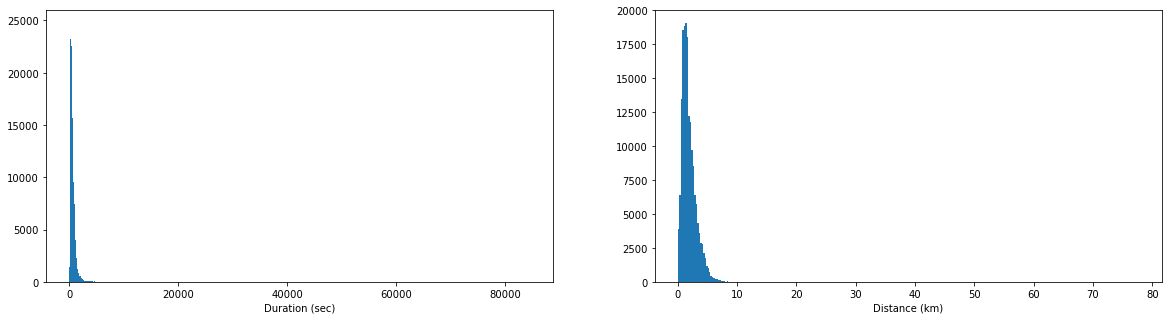

In [7]:
plt.figure(figsize=[20,5])

plt.subplot(1, 2, 1)
binsize = 100
bins = np.arange(0,df_bikes['duration_sec'].max()+binsize,binsize)
plt.hist(data = df_bikes, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')

plt.subplot(1, 2, 2)
binsize = .25
bins = np.arange(0,df_bikes['distance_km'].max()+binsize,binsize)
plt.hist(data = df_bikes, x = 'distance_km', bins = bins)
plt.xlabel('Distance (km)');

In [8]:
np.log10(df_bikes['duration_sec'].describe())

count    5.242733
mean     2.847589
std      3.215513
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

In [9]:
df_bikes['distance_km'].sort_values(ascending=False).head(25).reset_index()

,index,distance_km
0,112038,77.633325
1,19827,19.791777
2,87602,17.127962
3,50859,17.092388
4,153112,16.839987
5,121514,15.167418
6,85529,14.788655
7,89787,14.566033
8,161775,14.566033
9,60845,10.615639


The duration distribution seems to be right skewed, so let's change it to a log scale. Additionally, the distance distribution has one extreme outlier, so let's limit the x-axis. 

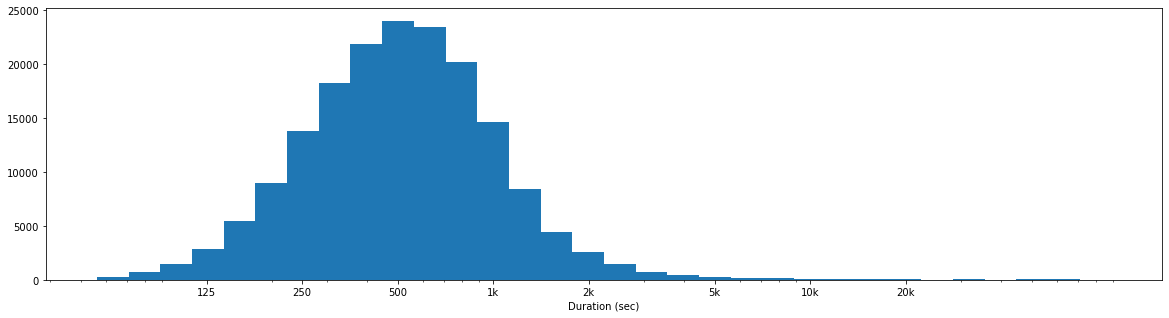

In [10]:
plt.figure(figsize=[20,5])

bins = 10 ** np.arange(1.75,5,0.1)
plt.hist(data = df_bikes, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([125, 250, 500, 1e3, 2e3, 5e3, 1e4, 2e4], [125, 250, 500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (sec)');

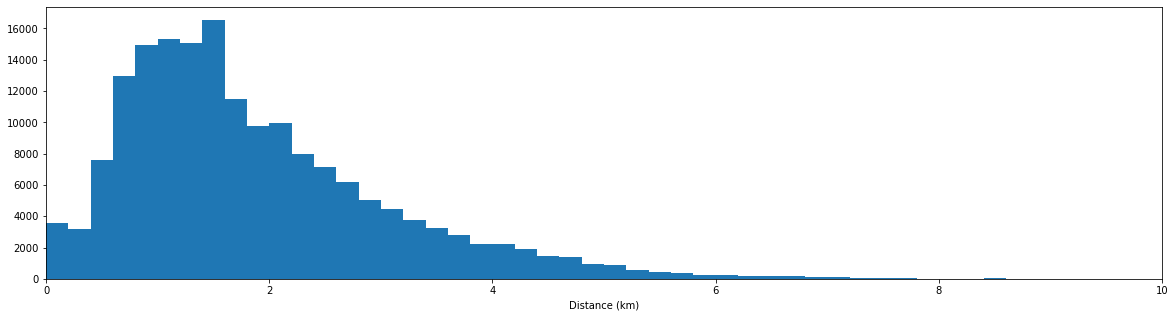

In [11]:
plt.figure(figsize=[20,5])

binsize = .2
bins = np.arange(0,df_bikes['distance_km'].max()+binsize,binsize)
plt.hist(data = df_bikes, x = 'distance_km', bins = bins)
plt.xlim([0,10])
plt.xlabel('Distance (km)');

On the independent variable side, let's look at a visualization for the distribution of ages and then we'll bar charts for gender and customer types.

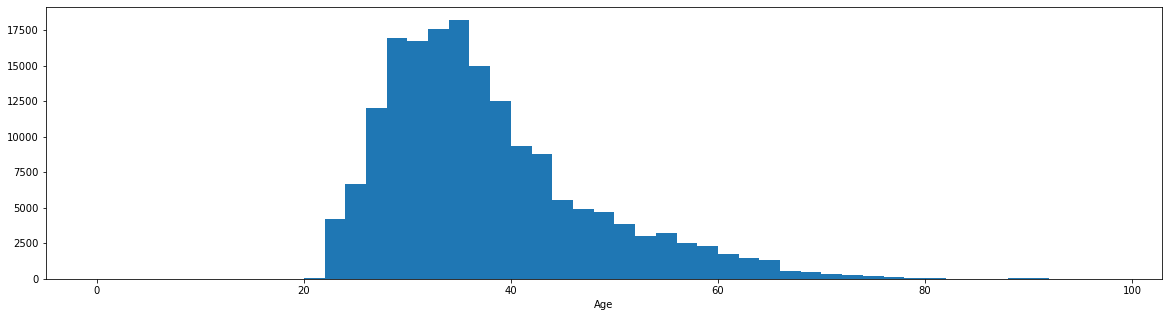

In [12]:
plt.figure(figsize=[20,5])
bins = np.arange(0,100,2)
plt.hist(data = df_bikes, x = 'member_age', bins = bins)
plt.xlabel('Age');

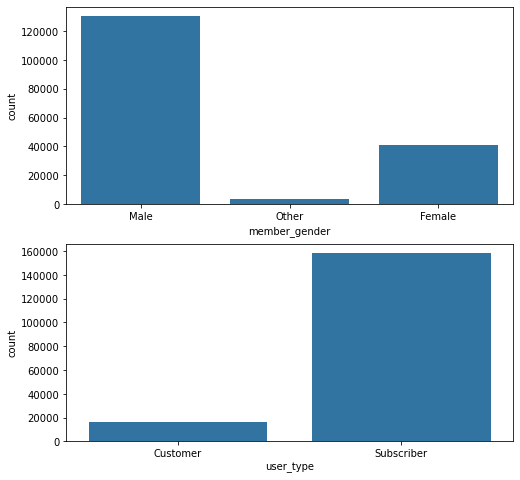

In [13]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df_bikes, x = 'member_gender', color = default_color, ax = ax[0])
sb.countplot(data = df_bikes, x = 'user_type', color = default_color, ax = ax[1])

plt.show();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The duration, distance and age distributions are all right-skewed. A logarithmic transformation normalized the duration data. The distance and age distrbutions were relatively contained in terms of scale, so it was easier to limit/remove outliers which are probably erroneous entries.

Other key observations:
- The mode for duration is around 10 minutes
- The majority of distances between stations lie below 2 km
- Most users are around 45 years old or less
- The majority of users are male
- The vast majority of users are subscribers instead of customers 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
In order to clean the data to make it easier to analyze, I completed the following:
- Dropped all rows containing null values
- Changed start and end times to datetime format for potentially easier access to date functions
- Changed birth year data type from float to integer
- Used start and end locations to determine distance between stations
- Calculated member age by subtracting their birth year from the current year
- Dropped ages greater than 100 since these seem like data quality issues 

## Bivariate Exploration
I'm going to start out by evaluating pairwise relationships between the data.

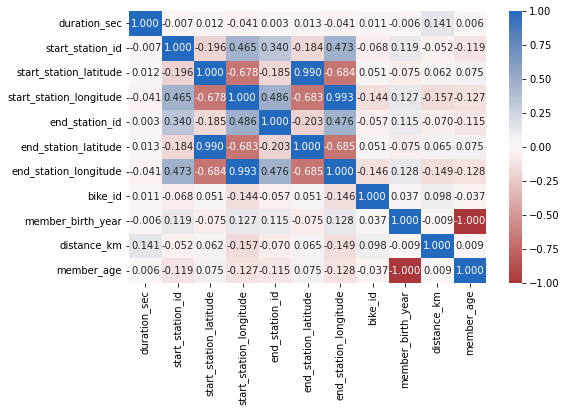

In [14]:
plt.figure(figsize = [8, 5])
sb.heatmap(df_bikes.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

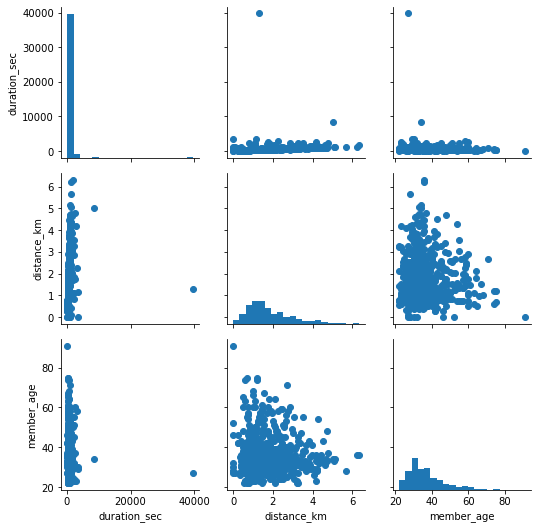

In [15]:
matrix_vars = ['duration_sec','distance_km','member_age']
bikes_samp = df_bikes.sample(n=500, replace = False)

g = sb.PairGrid(data = bikes_samp, vars = matrix_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
The most notable correlation pairs are as follows:
- start_station_id / end_station_id
- start_station_longitude / end_station_longitude
- start_station_latitude / end_station_latitude
- start_station_latitude / end_station_longitude
- start_station_longitude / end_station_latitude

It's worth noting that there appears to be little correlation between distance and age. Also, it appears that the outliers in duration and distance are heavily impacting the relationships associated with that data. I will remove those outliers and rerun the relationship matrices.

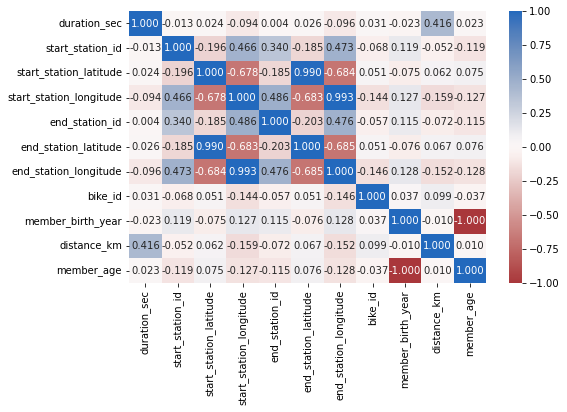

In [16]:
df_bikes_outliers = df_bikes.drop(df_bikes.query('duration_sec > 10000').index)
df_bikes_outliers.drop(df_bikes_outliers.query('distance_km > 30').index,inplace=True)

plt.figure(figsize = [8, 5])
sb.heatmap(df_bikes_outliers.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

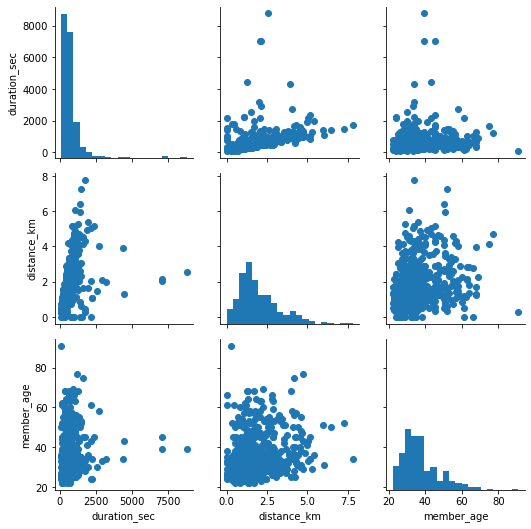

In [17]:
bikes_outl_samp = df_bikes_outliers.sample(n=500, replace = False)

g = sb.PairGrid(data = bikes_outl_samp, vars = matrix_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Removing distance and duration outliers substantially improved the relationship between those measures, but the relationship remains relatively weaker than anticipated.

I'd like to take a closer look at distance vs duration of the entire dataset, but with more outliers removed.

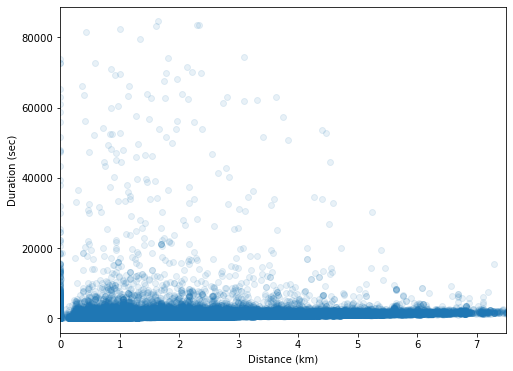

In [18]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df_bikes, x = 'distance_km', y = 'duration_sec', alpha = 1/10)
plt.xlim([0,7.5])
plt.xlabel('Distance (km)')
plt.ylabel('Duration (sec)')
plt.show();

Zooming in, it is more apparrent why the correlation cooefficient is not overly significant between these 2 variables. Regardless of the distance between stations, users tend to rent the bikes for roughly the same length of time.

Next, I wonder if we can take a deeper look at the relationships between age and both the duration and distance data. In order to do so, I will bucket the member's ages into 10-year blocks.

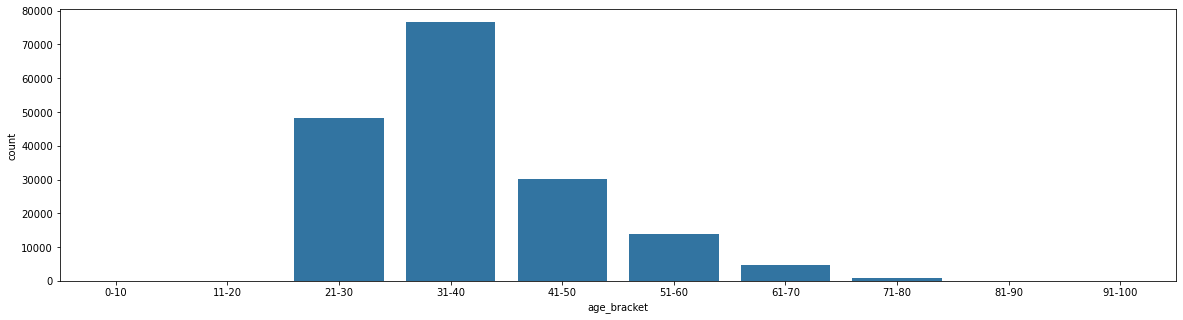

In [20]:
cut_labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
cut_bins = [0,10,20,30,40,50,60,70,80,90,100]
df_bikes_outliers['age_bracket'] = pd.cut(df_bikes_outliers['member_age'],bins=cut_bins,labels=cut_labels)

plt.figure(figsize=[20,5])
default_color = sb.color_palette()[0]
sb.countplot(data = df_bikes_outliers, x = 'age_bracket', color = default_color);

<Figure size 720x1440 with 0 Axes>

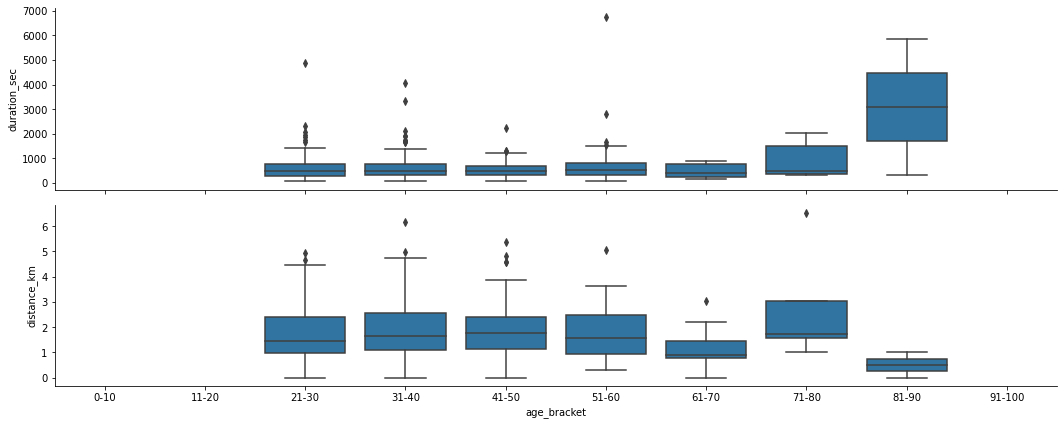

In [21]:
bikes_outl_samp = df_bikes_outliers.sample(n=500, replace = False)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
    
plt.figure(figsize = [10, 20])
g = sb.PairGrid(data = bikes_outl_samp, y_vars = ['duration_sec','distance_km'], x_vars = ['age_bracket'],
                height = 3, aspect = 5)
g.map(boxgrid)
plt.show();

<AxesSubplot:xlabel='age_bracket', ylabel='distance_km'>

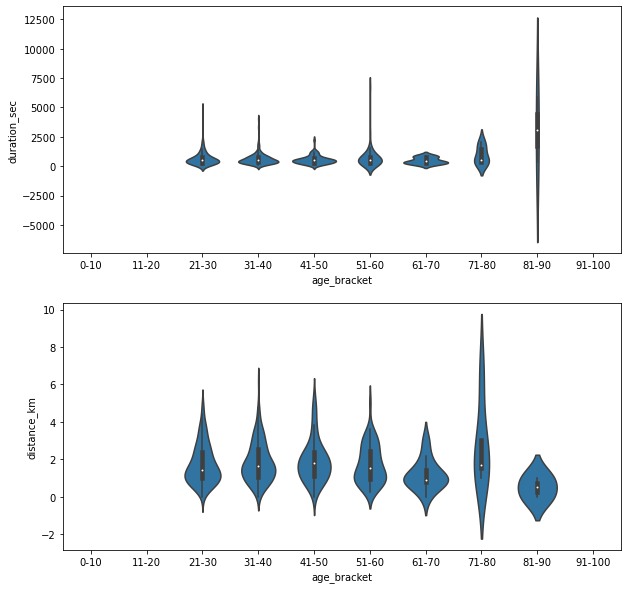

In [22]:
fig, ax = plt.subplots(ncols = 1, nrows = 2 , figsize = [10,10])

ax = plt.subplot(2,1,1)
sb.violinplot(data=bikes_outl_samp,x='age_bracket',y='duration_sec',color=sb.color_palette()[0])

ax = plt.subplot(2,1,2)
sb.violinplot(data=bikes_outl_samp,x='age_bracket',y='distance_km',color=sb.color_palette()[0])

It appears that across the different age brackets, the medians, means and quartiles of duration and distance are not extraordinarily dissimilar. However, the age brackets from 21-60 all have disproportionate numbers of outliers.

Next, I'd like to investigate how gender and user type might relate to these new age brackets.

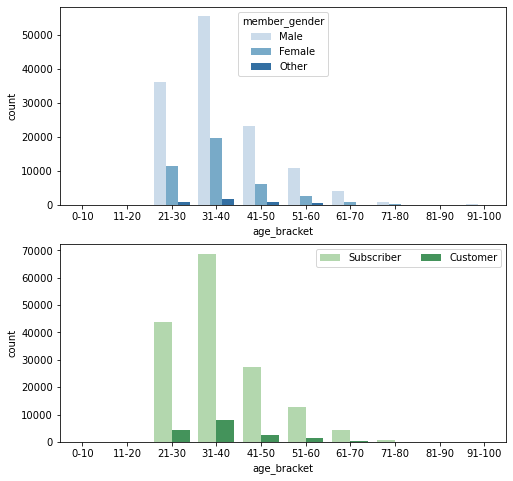

In [23]:
plt.figure(figsize = [8, 8])

plt.subplot(2, 1, 1)
sb.countplot(data = df_bikes_outliers, x = 'age_bracket', hue = 'member_gender', palette = 'Blues')

ax = plt.subplot(2, 1, 2)
sb.countplot(data = df_bikes_outliers, x = 'age_bracket', hue = 'user_type', palette = 'Greens')
ax.legend(ncol = 2)

All of the categorizing points to the same conclusions. The typical user is between the age of 31-40, male and a subscriber.

## Multivariate Exploration
Finally, based on all of the above, I want to use multivariate analysis to better visualize what kind of distinctions may be found in terms of duration and distance in terms of gender and user type.

I'll take the sample with major outliers removed and plot distance vs duration using colors to distinguish genders and user types. I'll need to zoom in order to make out the colored categories.

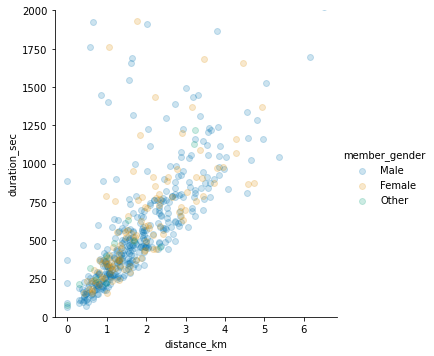

In [24]:
g = sb.FacetGrid(data = bikes_outl_samp, hue = 'member_gender', height = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'distance_km', 'duration_sec',alpha=0.2)
plt.ylim([0,2000])
g.add_legend();

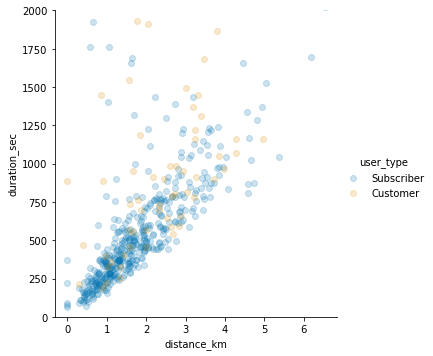

In [25]:
g = sb.FacetGrid(data = bikes_outl_samp, hue = 'user_type', height = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'distance_km', 'duration_sec',alpha=0.2)
plt.ylim([0,2000])
g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
### Were there any interesting or surprising interactions between features?
It appears that female and other gender have less concentration compared with males when it comes to distance and duration of bike rentals. Maybe this is simply due to a law of large numbers effect based on the fact that we have more data for males, or maybe there is a meaningful distinction.

Visually, there doesn't appear to be much of a distinction between subscribers and customers when it comes to distance and duration. This is somewhat surprising, since I would have expected subscribers to travel further and longer for more commuter-type rides.

## Conclusions
### Summary of Findings
The main exploratory concept I wanted to focus on was to relate user types, genders, originating/terminating stations and age with distance and duration of rides. My initial expectation was that young male subscribers would ride the longest and farthest. Instead, young male subscribers turned out to represent the largest conglomerate of users, but didn't necessarily ride the farthest/longest.

In general, both duration and distance data distributions were right-skewed with extreme outliers. Log-normalizing the duration data showed a mode of ~500 seconds per ride. Eliminating outliers for distance displays that the majority or rides were 2 km or less.

The most frequent ages are in the late 20's through the mid 30's. Males represent nearly triple the users than females and other genders combined. Subscribers outnumber customers by nearly 8 times.

Notable bivariate correlation pairs include the following:
- start_station_id / end_station_id
- start_station_longitude / end_station_longitude
- start_station_latitude / end_station_latitude
- start_station_latitude / end_station_longitude
- start_station_longitude / end_station_latitude

There turned out not to be a deep correlation between distance and duration, which was surprising. This must mean that there are a number of rentals that are not strictly for commuting purposes.

Across the different age brackets, the medians, means and quartiles of duration and distance are not extraordinarily dissimilar. However, the age brackets from 21-60 all have disproportionate numbers of outliers.

Finally, it appears that female and other gender have less concentration compared with males when it comes to distance and duration of bike rentals.
### Key Insights for Presentation
- The majority of users are young male subscribers
- Zooming in on distance vs duration shows there is surprisingly little influence of one variable on the other
- The only meaningful correlations demonstrate the start and end stations are oftened paired up
- Across the different age brackets, the medians, means and quartiles of duration and distance are not extraordinarily dissimilar. However, the age brackets from 21-60 all have disproportionate numbers of outliers.
- Female and other gender have less concentration compared with males when it comes to distance and duration of bike rentals.

In [27]:
df_bikes_outliers.to_csv('bikeDataClean.csv')